In [5]:
#Import packages
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from datetime import datetime
import numpy as np

In [6]:
#Read in excel data
data_g = pd.read_excel('G1PHIO.xlsx')  # Galileo data
data_j = pd.read_excel('JUNOMAG1.xlsx')  # Juno data

In [7]:
#Define variables from column data
GB_x = pd.read_excel('G1PHIO.xlsx', usecols='B') # Galileo B_x component
GB_y = pd.read_excel('G1PHIO.xlsx', usecols='C') # Galileo B_y component
GB_z = pd.read_excel('G1PHIO.xlsx', usecols='D') # Galileo B_z component
GB_mag = pd.read_excel('G1PHIO.xlsx', usecols='E') # Galileo B_mag component
GSat_x = pd.read_excel('G1PHIO.xlsx', usecols='F') # Galileo Sat_x component
GSat_y = pd.read_excel('G1PHIO.xlsx', usecols='G') # Galileo Sat_y component
GSat_z = pd.read_excel('G1PHIO.xlsx', usecols='H') # Galileo Sat_z component
date_g = pd.read_excel('G1PHIO.xlsx', usecols=[0]).iloc[:, 0].tolist()  # Galileo dates

JB_x = pd.read_excel('JUNOMAG1.xlsx', usecols='C') # Juno B_x component
JB_y = pd.read_excel('JUNOMAG1.xlsx', usecols='D') # Juno B_y component
JB_z = pd.read_excel('JUNOMAG1.xlsx', usecols='E') # Juno B_z component
JSat_x = pd.read_excel('JUNOMAG1.xlsx', usecols='F') # Juno Sat_x component
JSat_y = pd.read_excel('JUNOMAG1.xlsx', usecols='G') # Juno Sat_y component
JSat_z = pd.read_excel('JUNOMAG1.xlsx', usecols='H') # Juno Sat_z component
date_j = pd.read_excel('JUNOMAG1.xlsx', usecols=[1]).iloc[:, 0].tolist()  # Juno dates

In [ ]:
#Function to convert decimal date data for plotting (Juno Data)
base_date = datetime(2021, 1, 1)
delta = []
d = []

def convert(x):
    for z in x:
        y = timedelta(z)
        delta.append(y)
        d.append([base_date + y])
    return d

date_list = convert(date_j)

formatted_dates = []
for date_sublist in date_list:
    for date_obj in date_sublist:
        formatted_date = date_obj.strftime("%H:%M")
        formatted_dates.append(formatted_date)

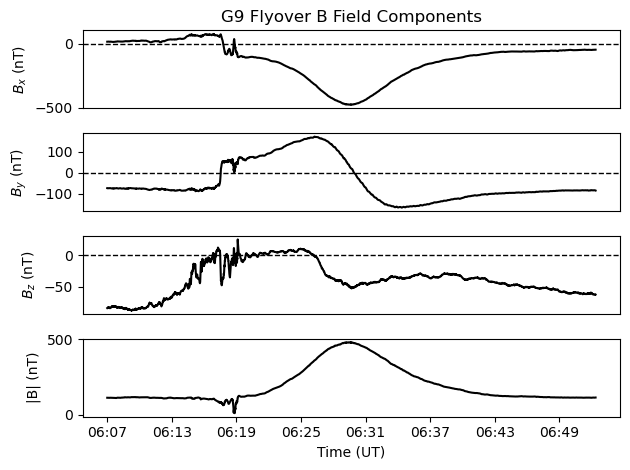

In [8]:
#Graphing the magnetic field components (Galileo Data)

#Data
x = GB_x
y = GB_y
z = GB_z
m = GB_mag
datg = date_g

#Formatting Datetime for graph readability
time_intervals = range(0, len(date_g), 1080)
formatted_dates = [datetime.strptime(dt, '%Y-%m-%dT%H:%M:%S.%f').strftime('%H:%M') for dt in date_g]

fig, axs = plt.subplots(4, 1)

#B_x plot for G1 Flyover
axs[0].plot(datg, x, color = 'black')
axs[0].set_ylabel('$B_{x}$ (nT)')
axs[0].set_title('G9 Flyover B Field Components')
axs[0].set_xticks([])
axs[0].set_xticklabels([])
axs[0].axhline(0, color='k', linestyle='--', linewidth = 1)


#B_y plot for G1 Flyover
axs[1].plot(datg, y, color = 'black')
axs[1].set_ylabel('$B_{y}$ (nT)')
axs[1].set_xticks([])
axs[1].set_xticklabels([])
axs[1].axhline(0, color='k', linestyle='--', linewidth = 1) 



#B_z plot for G1 Flyover
axs[2].plot(datg, z, color = 'black')
axs[2].set_ylabel('$B_{z}$ (nT)')
axs[2].set_xticks([])
axs[2].set_xticklabels([])
axs[2].axhline(0, color='k', linestyle='--', linewidth = 1)



#B_mag plot for G1 Flyover
axs[3].plot(datg, m, color = 'black')
axs[3].set_xlabel('Time (UT)')
axs[3].set_ylabel('|B| (nT)')
axs[3].set_xticks([date_g[i] for i in time_intervals])
axs[3].set_xticklabels(formatted_dates[::1080])




#Graph tidying
plt.tight_layout()

#Show graph
plt.savefig('G1_Mag_Components.png')
plt.show()

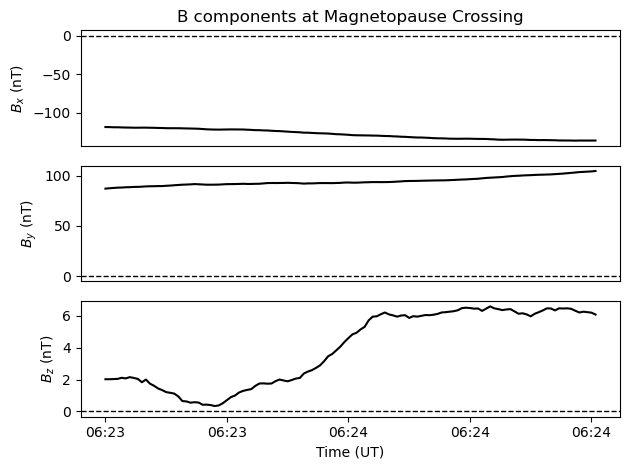

In [9]:
#Graphing the magnetopause crossings (Galileo Data)

#Data
x = GB_x
y = GB_y
z = GB_z
datg = date_g

#Formatting Datetime for graph readability
step = len(datg[2656:2778]) // 4
time_intervals = range(0, len(d[2656:2778]), step)
formatted_dates = [datetime.strptime(dt, '%Y-%m-%dT%H:%M:%S.%f').strftime('%H:%M') for dt in date_g[2975:3106]]

fig, axs = plt.subplots(3, 1)

#B_x plot for G1 Flyover
axs[0].plot(datg[2656:2778], x[2656:2778], color = 'black')
axs[0].set_ylabel('$B_{x}$ (nT)')
axs[0].set_title('B components at Magnetopause Crossing')
axs[0].set_xticks([])
axs[0].set_xticklabels([])
axs[0].axhline(0, color='k', linestyle='--', linewidth = 1)


#B_y plot for G1 Flyover
axs[1].plot(datg[2656:2778], y[2656:2778], color = 'black')
axs[1].set_ylabel('$B_{y}$ (nT)')
axs[1].set_xticks([])
axs[1].set_xticklabels([])
axs[1].axhline(0, color='k', linestyle='--', linewidth = 1)

#B_z plot for G1 Flyover
axs[2].plot(datg[2656:2778], z[2656:2778], color = 'black')
axs[2].set_xlabel('Time (UT)')
axs[2].set_ylabel('$B_{z}$ (nT)')
axs[2].set_xticks([date_g[2656:2778][i] for i in time_intervals])
axs[2].set_xticklabels(formatted_dates[::step])
axs[2].axhline(0, color='k', linestyle='--', linewidth = 1)


#Graph tidying
plt.tight_layout()

#Show graph
plt.savefig('G1_Magnetopause.png')
plt.show()

In [ ]:
#Graphing the magnetic field components (Juno Data)

x = JB_x
y = JB_y
z = JB_z
datj = date_j
#Formatting Datetime for graph readability
time_intervals = range(0, len(date), 100000)

fig, axs = plt.subplots(3, 1)

#B_x plot for Juno
axs[0].plot(datj, x, color = 'black')
axs[0].set_ylabel('$B_{x}$ (nT)')
axs[0].set_title('Juno B Field Components')
axs[0].set_xticks([])
axs[0].set_xticklabels([])
axs[0].axhline(0, color='k', linestyle='--', linewidth = 1)


#B_y plot for Juno
axs[1].plot(datj, y, color = 'black')
axs[1].set_ylabel('$B_{y}$ (nT)')
axs[1].set_xticks([])
axs[1].set_xticklabels([])
axs[1].axhline(0, color='k', linestyle='--', linewidth = 1) 



#B_z plot for Juno
axs[2].plot(datj, z, color = 'black')
axs[2].set_xlabel('Time (UT)')
axs[2].set_ylabel('$B_{z}$ (nT)')
axs[2].set_xticks([date[i] for i in time_intervals])
axs[2].set_xticklabels(formatted_dates[::100000])
axs[2].axhline(0, color='k', linestyle='--', linewidth = 1)


#Graph tidying
plt.tight_layout()

#Show graph
plt.savefig('Juno_Mag_Components.png')
plt.show()